# OverView

Exploring data

**refrence**
1. 

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import ipdb
%matplotlib inline

In [156]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")
train_copy = train.copy().reset_index(drop=True)
test_copy = test.copy().reset_index(drop=True)
train_copy["dataset"] = "train"
test_copy["dataset"] = "test"
concat = pd.concat([train_copy, test_copy])
del train_copy, test_copy

use_features = [col for col in train.columns if col not in ["Id", "SalePrice"]]
cat_features = [col for col in use_features if train[col].dtypes == "object"]
num_features = [col for col in use_features if train[col].dtypes != "object"]
discrete_features = [col for col in num_features if train[col].dtype == "int64"]
countinuous_features = [col for col in num_features if train[col].dtype == "float64"]

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. NULL の分析

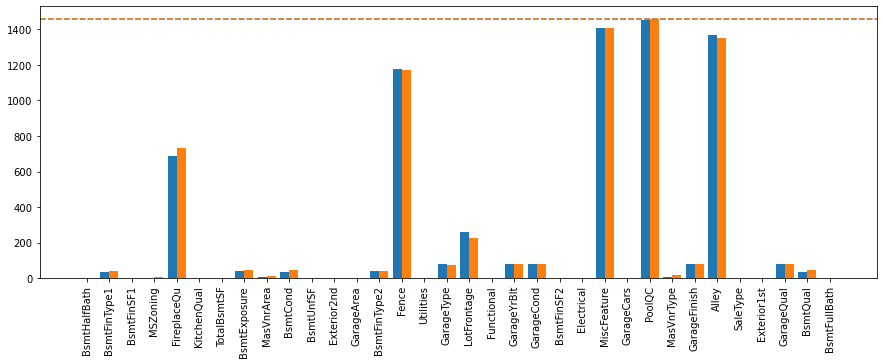

In [28]:
train_null_col = train.columns[train.isnull().sum() > 0]
test_null_col = test.columns[test.isnull().sum() > 0]
full_null_col = list(set(train_null_col) | set(test_null_col))

train_null_counts = train.isnull().sum()[full_null_col]
test_null_counts = test.isnull().sum()[full_null_col]

fig, ax = plt.subplots(figsize=(15, 5))
x_loc = np.arange(len(full_null_col))
bar_width = 0.4

ax.bar(x=x_loc - bar_width / 2, height=train_null_counts, width=bar_width)
ax.bar(x=x_loc + bar_width / 2, height=test_null_counts, width=bar_width)

ax.set_xticks(x_loc)
ax.set_xticklabels(full_null_col)
ax.xaxis.set_tick_params(labelrotation=90)

ax.axhline(train.shape[0], color="blue", ls="--")
ax.axhline(test.shape[0], color="orange", ls="--")

In [29]:
# ほとんどnullのcolumn
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False).head()

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64

In [52]:
print(set(full_null_col) - set(train_null_col))

{'Exterior1st', 'TotalBsmtSF', 'Functional', 'BsmtFinSF2', 'GarageCars', 'SaleType', 'Exterior2nd', 'KitchenQual', 'BsmtUnfSF', 'Utilities', 'BsmtHalfBath', 'BsmtFinSF1', 'GarageArea', 'BsmtFullBath', 'MSZoning'}


* ほとんどがnullであるcolumnがある e.g. PoolQC, FireplaceQC, Alley, MiscFeature, Fence
* train と test dataのnullの分布に大きな違いはない
* train に null はないが test に null が含まれることがあるので注意

### 2. 1変数の分析

#### categorical

In [67]:
train.describe(include=["O"])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


* train data の categorical の分布

* test data の categorical の分布

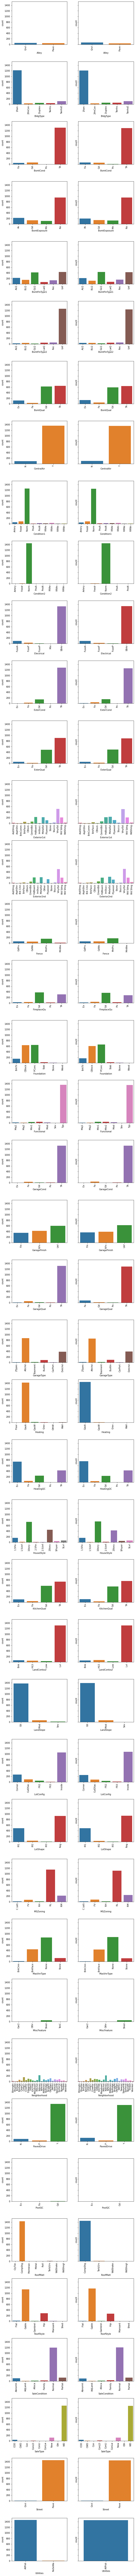

In [36]:
cat_features = sorted(cat_features)
col = 2
row = len(cat_features)

fig, axes = plt.subplots(row, col, figsize=(col * 5, row * 5), sharey=True, sharex=False)
fig.subplots_adjust(hspace=0.4)

for c in range(col):
    counter = 0
    for r in range(row):
        
        if counter >= len(cat_features):
            axes[r, c].set_visible(False)
        else:
            if c % 2 == 0:
                sns.countplot(data=train, x=cat_features[counter], ax=axes[r, c], order=train[cat_features[counter]].dropna().sort_values().unique())
            elif c % 2 == 1:
                sns.countplot(data=test, x=cat_features[counter], ax=axes[r, c], order=test[cat_features[counter]].dropna().sort_values().unique())
            
            axes[r, c].xaxis.set_tick_params(labelrotation=90)
            counter += 1

* train data と test data の分布はほぼ同じ
* 最頻値がほとんどとなるものも多い
    * **そういうものはそれとotherに分ければよいか**

* test data にだけあって train data に含まれないcategoricalの値はあるか

In [123]:
for col in cat_features:
    train_set = set(train[col])
    test_set = set(test[col])
    full_set = train_set | test_set
    
    test_only_set = full_set - train_set
    if test_only_set:
        print(f"{col}: {test_only_set}\n")
    else:
        print(f"{col}: train contains all categorical values!!\n")   

MSZoning: {nan}

Street: train contains all categorical values!!

Alley: train contains all categorical values!!

LotShape: train contains all categorical values!!

LandContour: train contains all categorical values!!

Utilities: {nan}

LotConfig: train contains all categorical values!!

LandSlope: train contains all categorical values!!

Neighborhood: train contains all categorical values!!

Condition1: train contains all categorical values!!

Condition2: train contains all categorical values!!

BldgType: train contains all categorical values!!

HouseStyle: train contains all categorical values!!

RoofStyle: train contains all categorical values!!

RoofMatl: train contains all categorical values!!

Exterior1st: {nan}

Exterior2nd: {nan}

MasVnrType: train contains all categorical values!!

ExterQual: train contains all categorical values!!

ExterCond: train contains all categorical values!!

Foundation: train contains all categorical values!!

BsmtQual: train contains all categorical 

* test data にしかないcategoricalの値はないが、**test data にだけ nan が含まれるcolumnsがあることに注意**

### numerical

* discrete (ほとんどcategoricalとみていい) と numerical が混ざっている

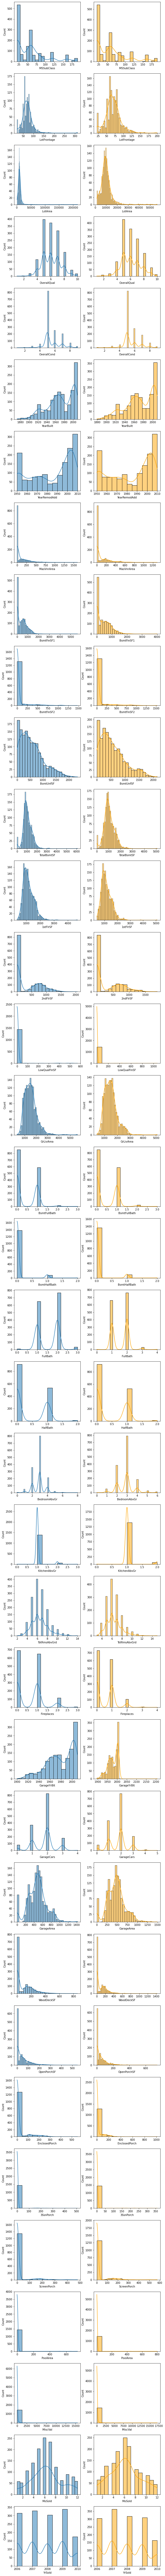

In [153]:
col = 2
row = len(num_features)

fig, axes = plt.subplots(row, col, figsize=(col * 5, row * 5))

for c in range(col):
    counter = 0
    for r in range(row):
        
        if counter >= len(num_features):
            axes[r, c].set_visible(False)
        else:
            if c % 2 == 0:
                sns.histplot(data=train, x=num_features[counter], kde=True, ax=axes[r, c])
            elif c % 2 == 1:
                sns.histplot(data=test, x=num_features[counter], kde=True, ax=axes[r, c], color="orange")

            counter += 1

#### target distribution

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

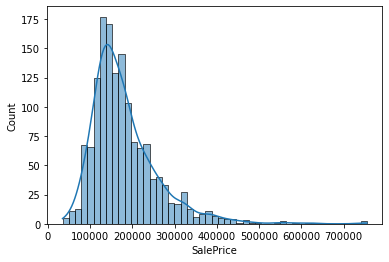

In [156]:
sns.histplot(data=train, x="SalePrice", kde=True)

### 2. target vs categorical

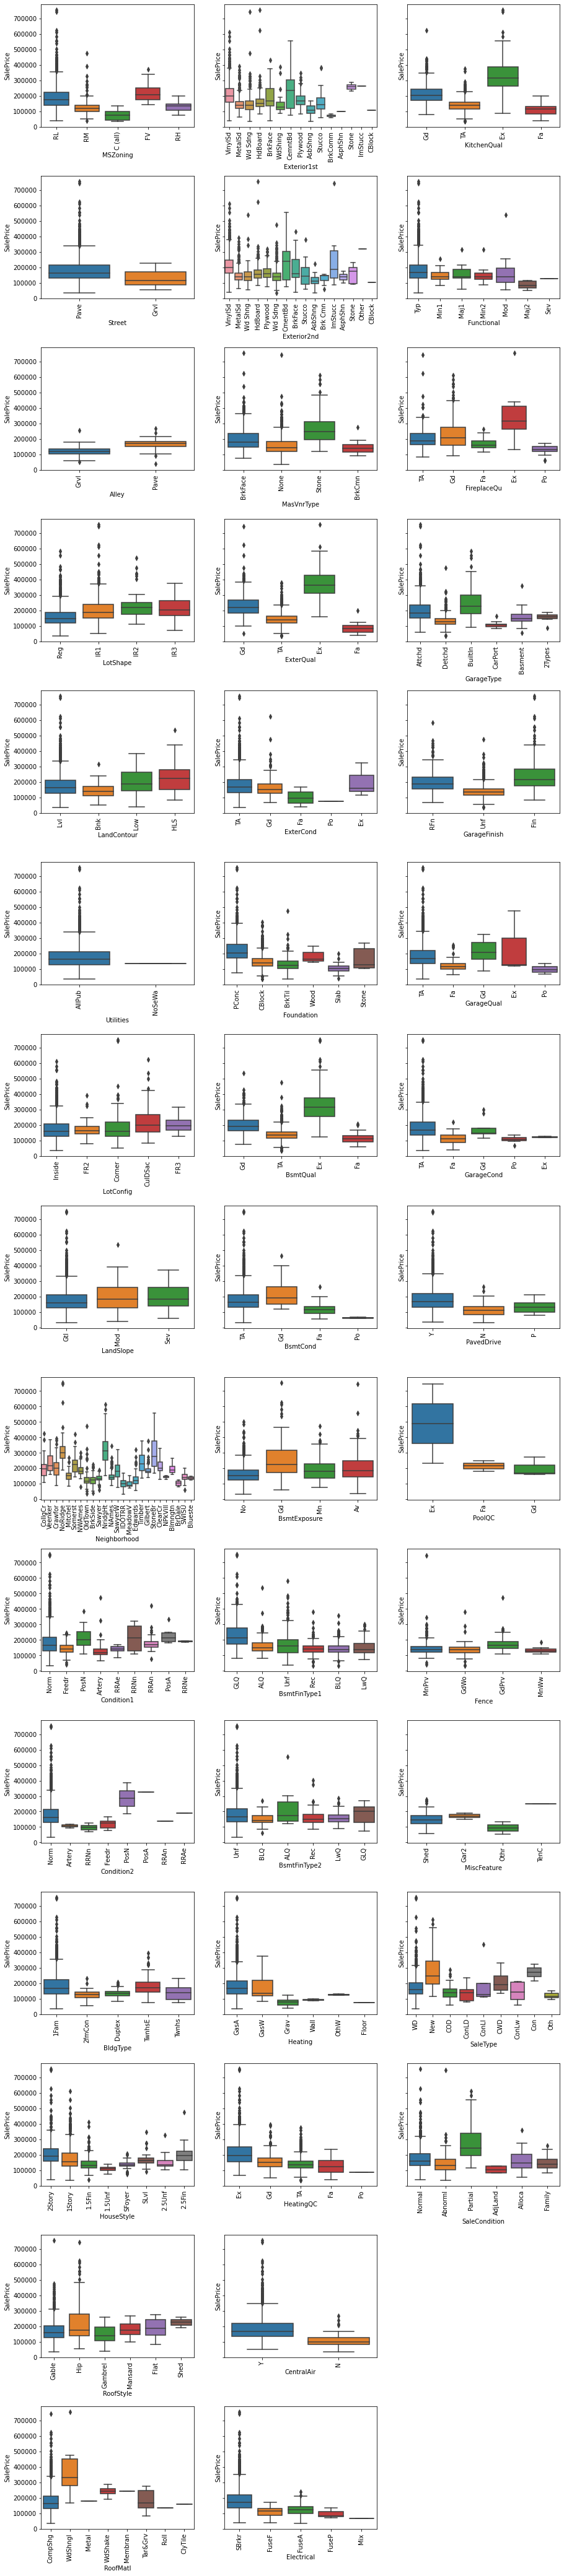

In [160]:
col = 3
row = math.ceil(len(cat_features) / col)

fig, axes = plt.subplots(row, col, figsize=(col * 5, row * 5), sharey=True)
fig.subplots_adjust(hspace=0.4)

i = 0
for c in range(col):
    for r in range(row):
        
        if i >= len(cat_features):
            axes[r, c].set_visible(False)
        else:
            sns.boxplot(data=train, x=cat_features[i], y="SalePrice", ax=axes[r, c])
            axes[r, c].xaxis.set_tick_params(labelrotation=90)
            i += 1


### 3. target vs numerical

* target vs discrete

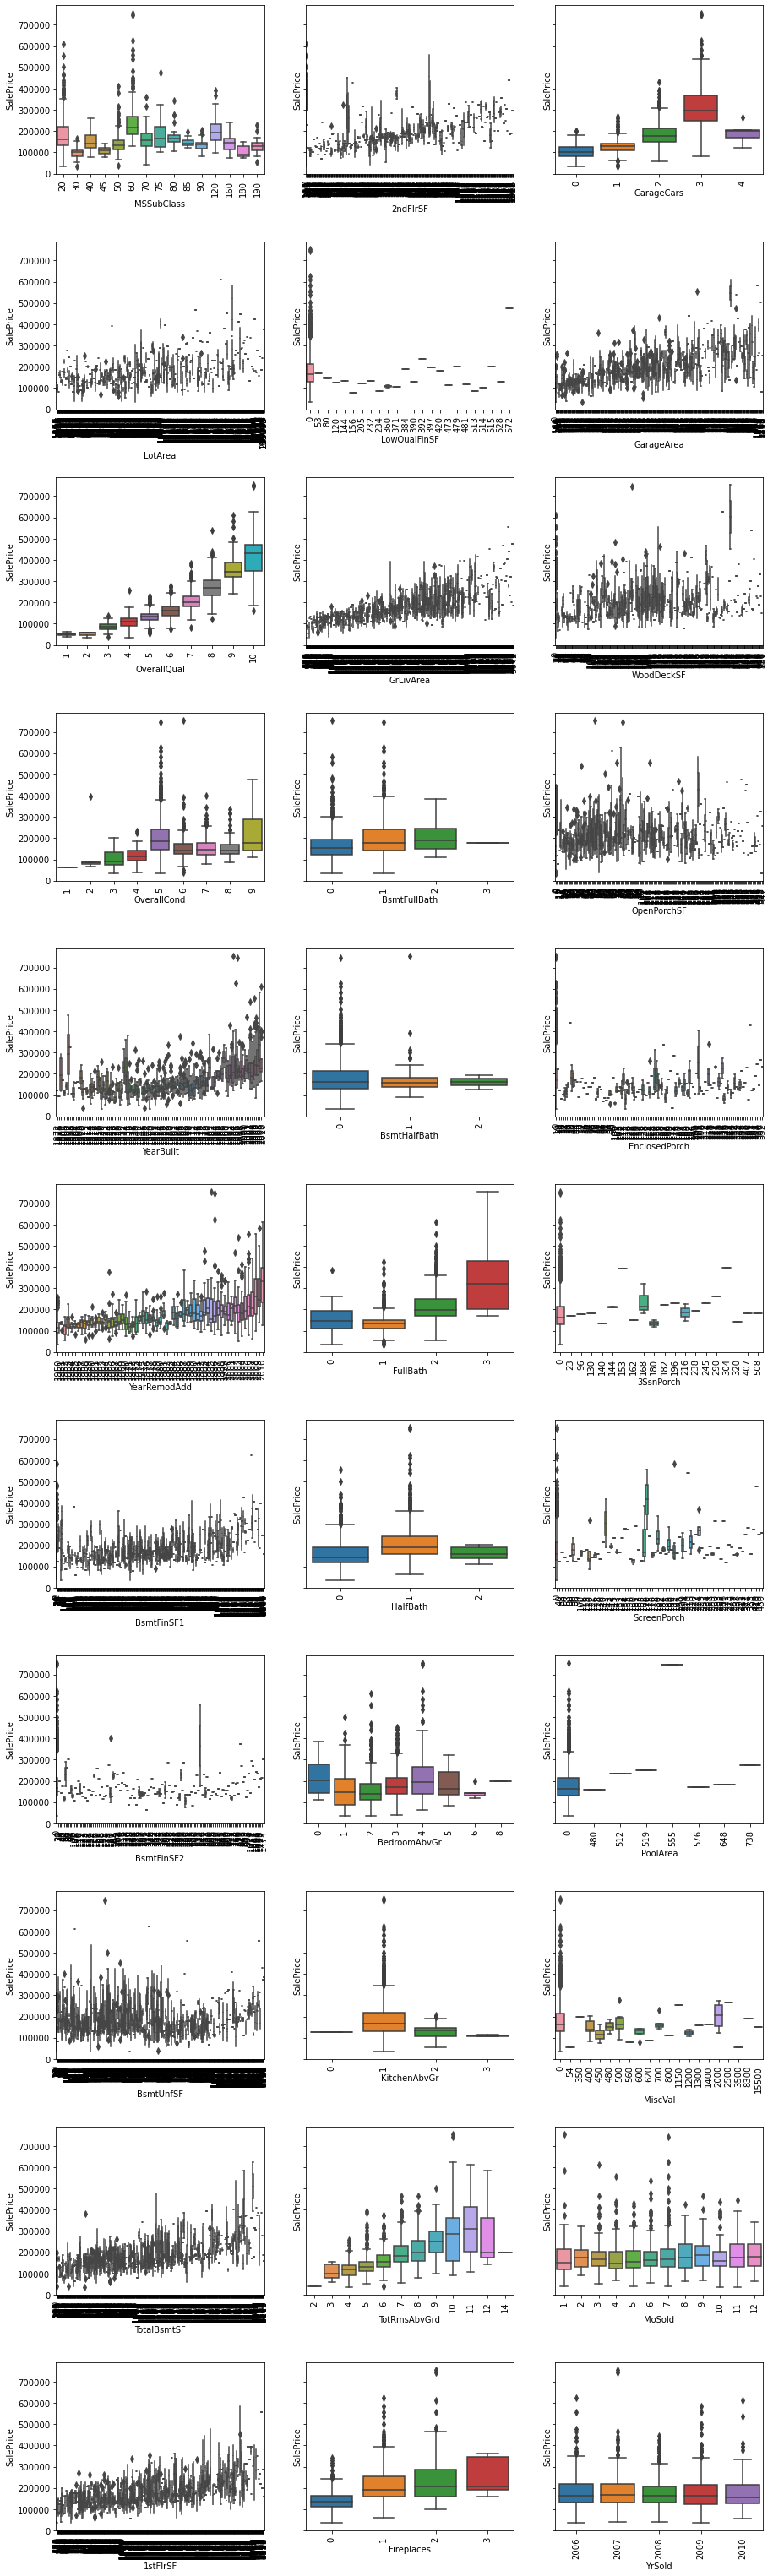

In [8]:
col = 3
row = math.ceil(len(discrete_features) / col)
train_copy = train.copy()
train_copy[discrete_features] = train_copy[discrete_features].astype("object")

fig, axes = plt.subplots(row, col, figsize=(col * 5, row * 5), sharey=True)
fig.subplots_adjust(hspace=0.4)

i = 0
for c in range(col):
    for r in range(row):
        
        if i >= len(discrete_features):
            axes[r, c].set_visible(False)
        else:
            sns.boxplot(data=train_copy, x=discrete_features[i], y="SalePrice", ax=axes[r, c])
            axes[r, c].xaxis.set_tick_params(labelrotation=90)
            i += 1


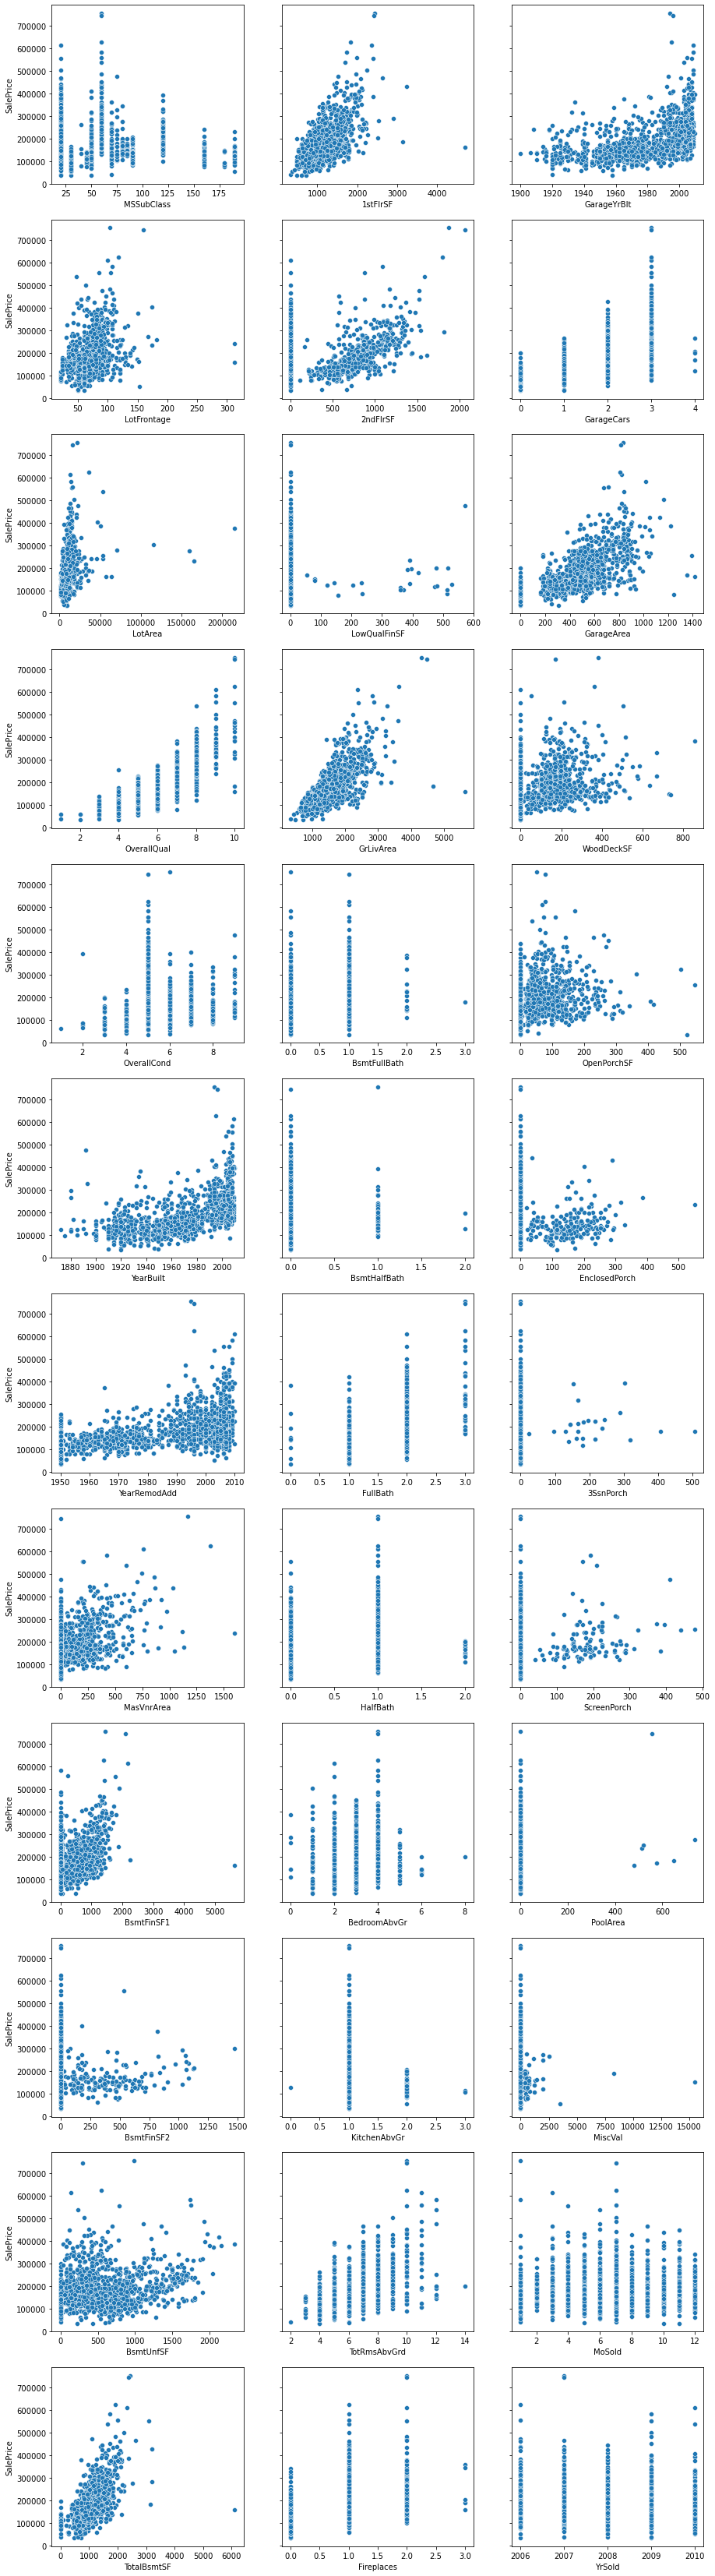

In [4]:
col = 3
row = math.ceil(len(num_features) / col)

fig, axes = plt.subplots(row, col, figsize=(col * 5, row * 5), sharey=True)

i = 0
for c in range(col):
    for r in range(row):
        
        if i >= len(num_features):
            axes[r, c].set_visible(False)
        else:
            sns.scatterplot(data=train, x=num_features[i], y="SalePrice", ax=axes[r, c])
            i += 1


### NULL値をどうにかする

In [157]:
train_copy = train.copy().reset_index(drop=True)
test_copy = test.copy().reset_index(drop=True)
train_copy["dataset"] = "train"
test_copy["dataset"] = "test"
concat = pd.concat([train_copy, test_copy])
del train_copy, test_copy

# null値が多すぎるのでdropするものたち

drop_null_cols = ["PoolQC", "MiscFeature", "Alley", "Fence"]
concat.drop(columns=drop_null_cols, inplace=True)

# List of 'NaN' including columns where NaN's mean none.
# ここのfeaturesのcolumnのnanは値がないことを示している
none_cols = [
    'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', "Exterior2nd"
]

concat[none_cols] = concat[none_cols].fillna("None")

# ここのcolumnsのnanは値が0であることを示している
zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]
concat[zero_cols] = concat[zero_cols].fillna(0)


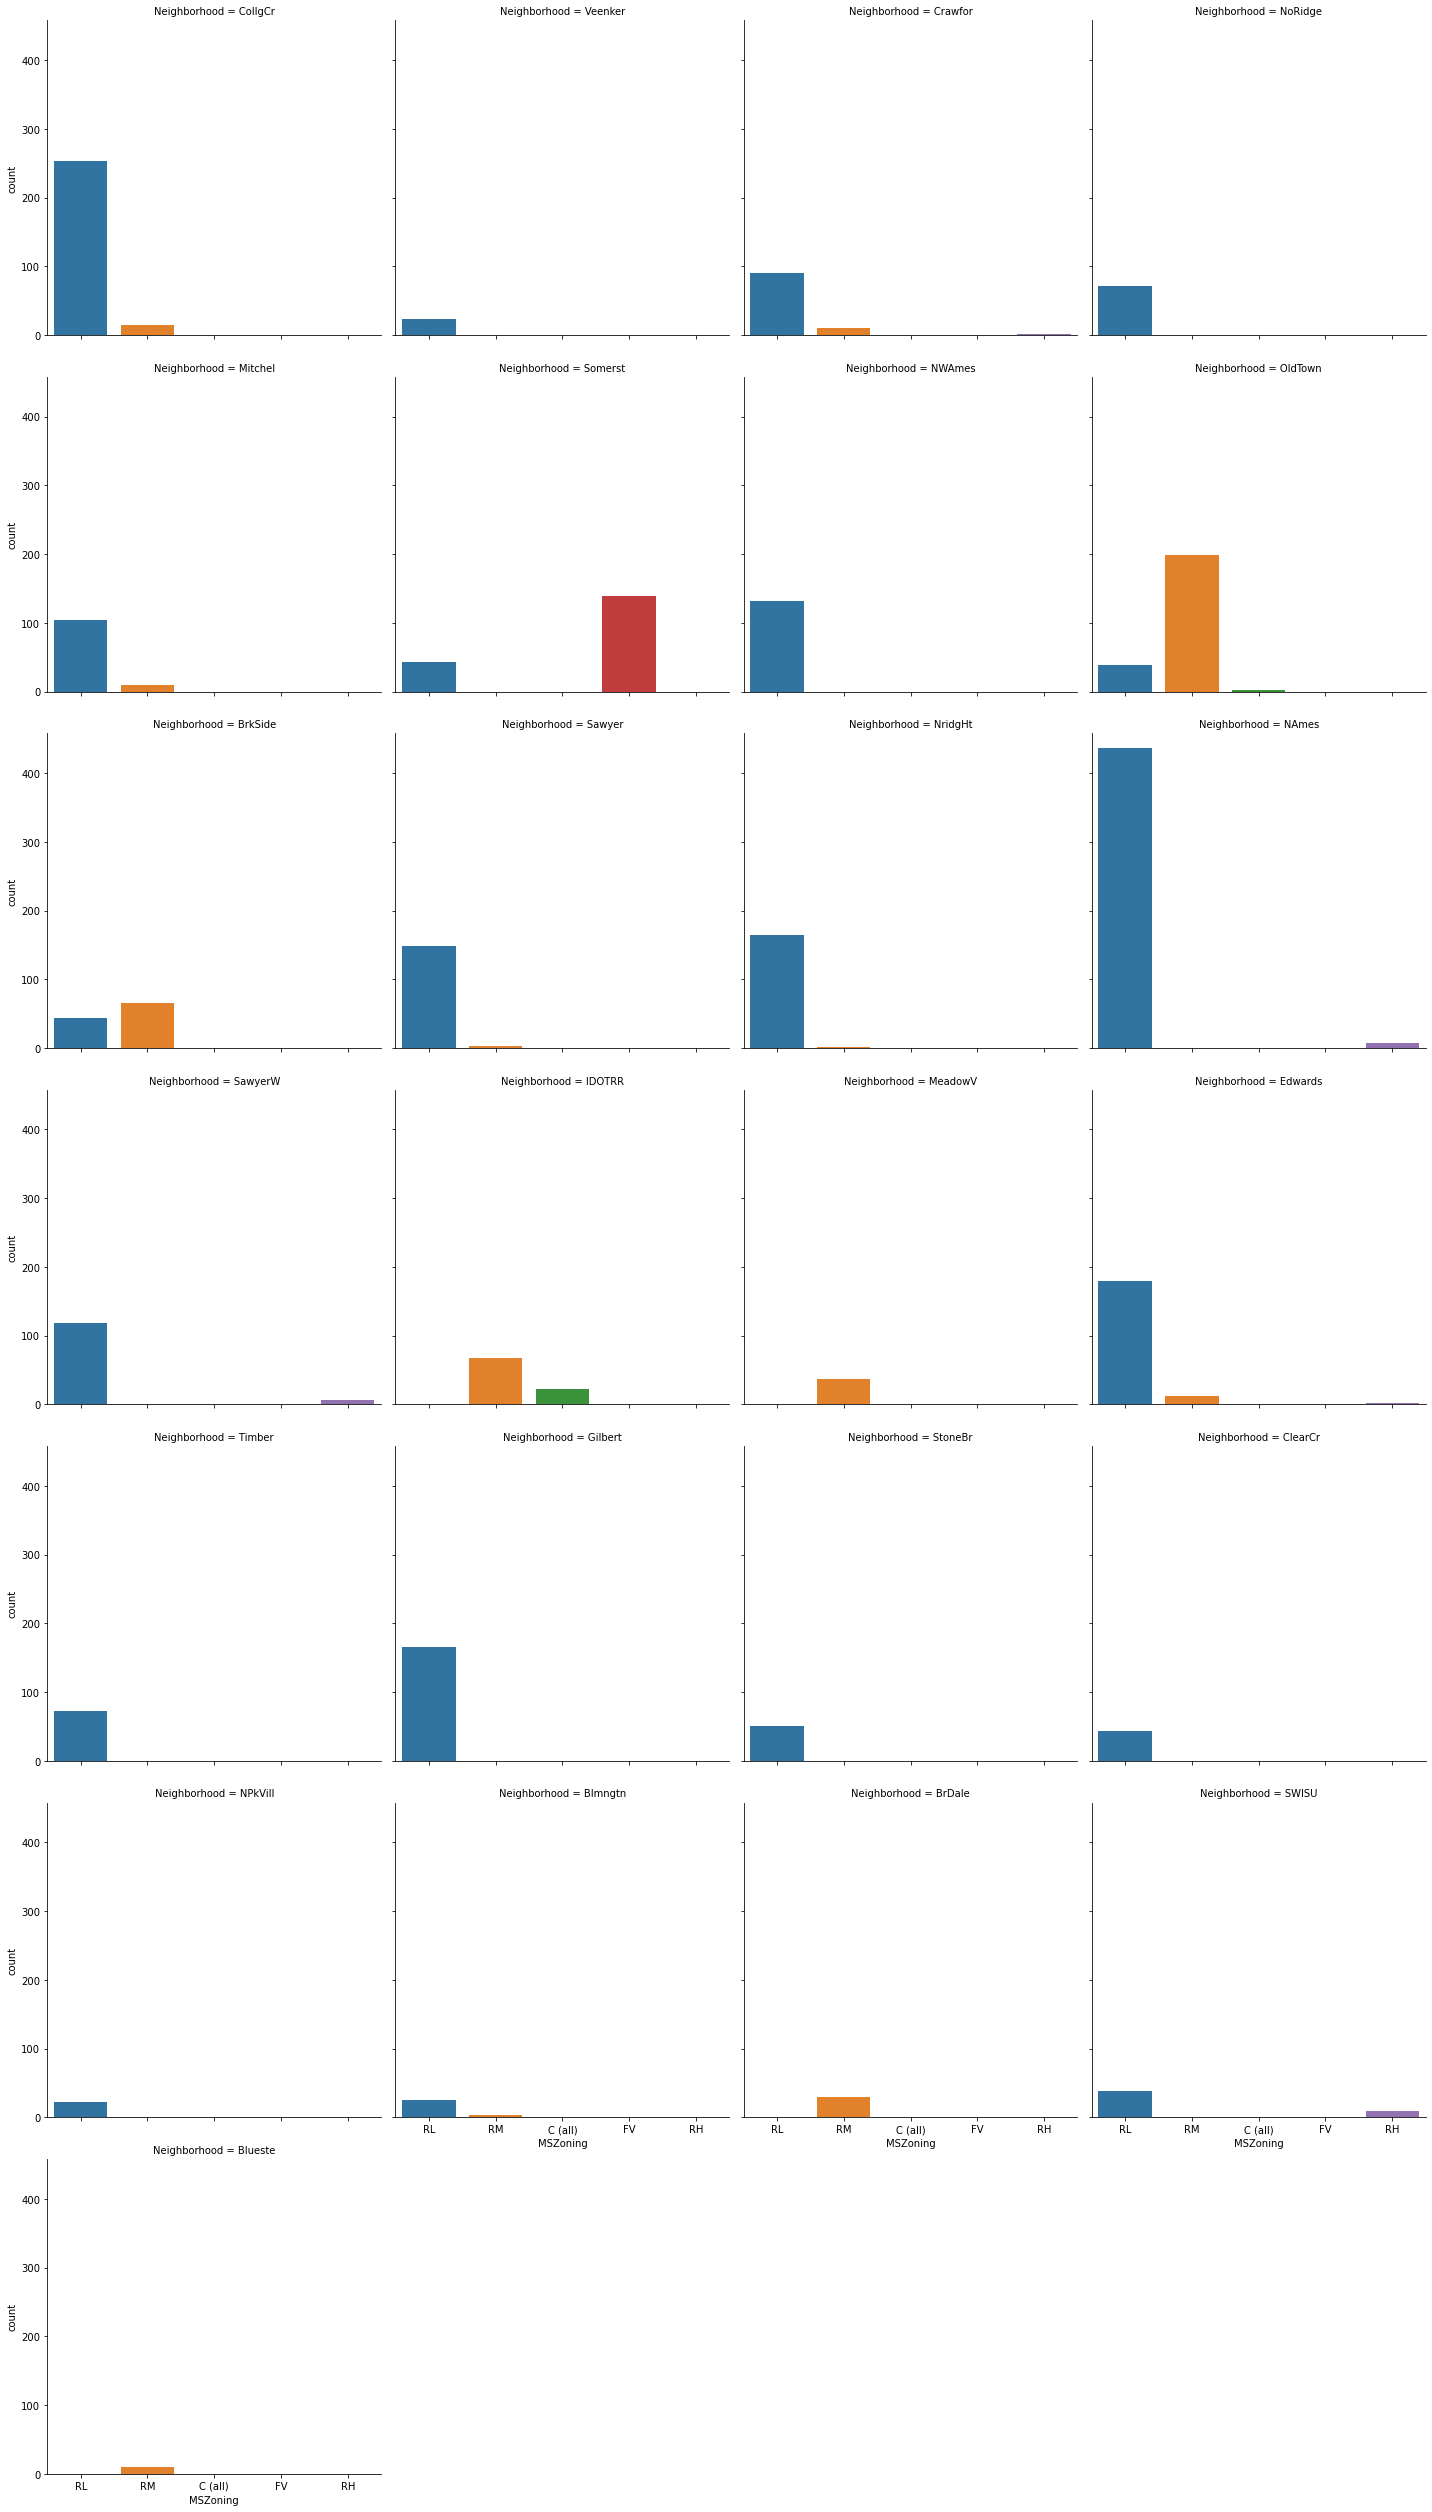

In [90]:
#order = ["Ex", "Gd", "TA", "Fa", "Po"]
sns.catplot(data=concat, col="Neighborhood", x="MSZoning", kind="count", col_wrap=4)

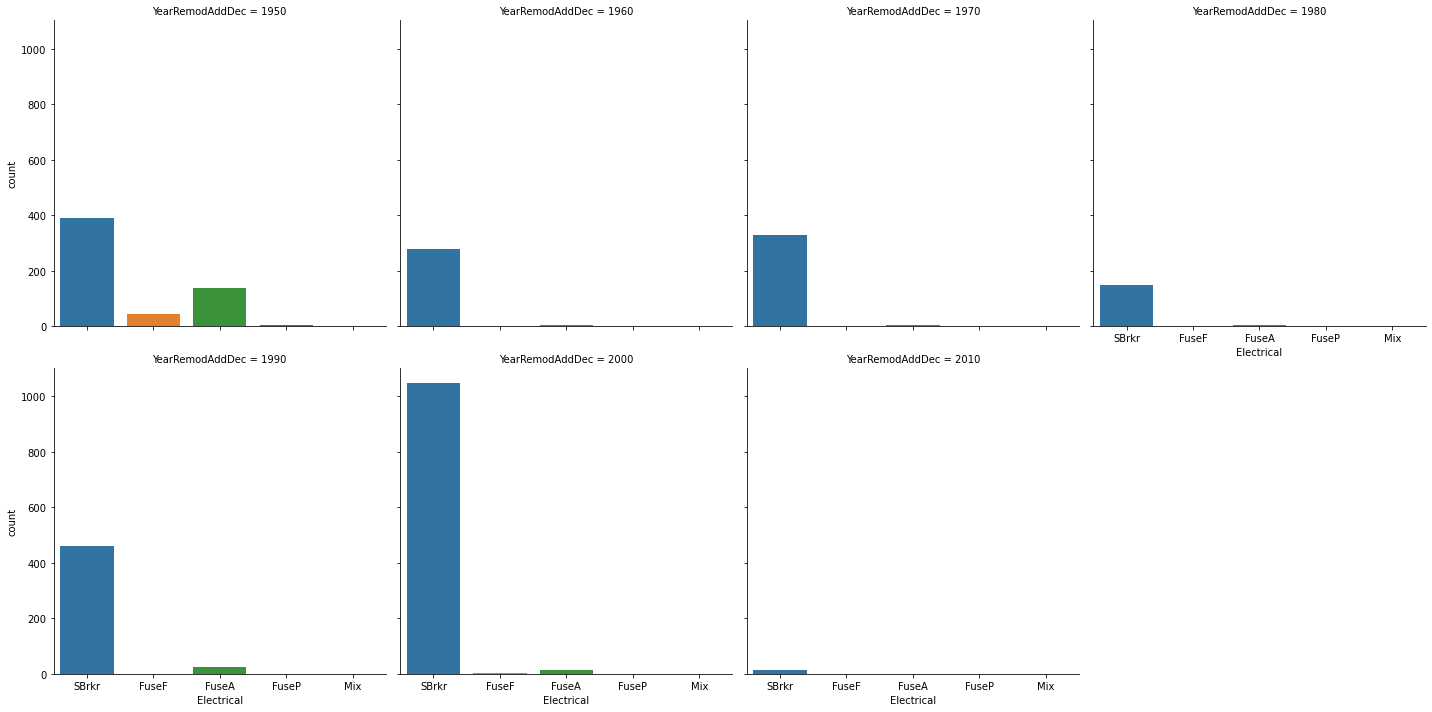

In [88]:
concat_add = concat.copy()
concat_add["YearRemodAddDec"] = (concat["YearRemodAdd"] // 10) * 10
#order = ["Ex", "Gd", "TA", "Fa", "Po"]
sns.catplot(data=concat_add, col="YearRemodAddDec", x="Electrical", kind="count", col_wrap=4)

In [185]:
# そのほかのnull埋め
# MSZoning, Exterior2nd, Exterior1st -> Neighborhood mode DataLeakage?
# KitchenQual -> BuildMod mode DataLeakage?
# Utilities Electrical Functional SaleType -> mode DataLeakge?

train2 = concat.iloc[:train.shape[0]].copy()
test2 = concat.iloc[train.shape[0]:].copy()

from sklearn.impute import SimpleImputer
mode_cols = ["Utilities", "Electrical", "Functional", "SaleType"]
imputer = SimpleImputer(strategy="most_frequent")
train2[mode_cols] = imputer.fit_transform(train2[mode_cols])
test2[mode_cols] = imputer.transform(test2[mode_cols])


class mode_by_feature_imputer():
    """
    X_catの値ごとにX_naのmodeを計算し、その値でX_na内のnanを埋める
    X_na: fill値がある値のSeries
    X_cat: その値ごとのX_naの最頻値を算出するためのSeries
    """
    def __init__(self):
        pass
        
    def fit(self, X_na, X_cat):
        na_name = X_na.name
        cat_name = X_cat.name
        df = pd.DataFrame({na_name: X_na, cat_name: X_cat})
        self.dic = df.groupby(cat_name)[na_name].apply(lambda x: x.mode()[0]).to_dict()
        return self
        
    def transform(self, X_na, X_cat):
        ser = X_na.copy()
        ser[ser.isnull()] = X_cat[ser.isnull()].map(self.dic)
        return ser

    
    
# data lealage を抑えるためにtrain2のみでBuildRemodYearごとのmodeを計算してそれをtrain, testに適用する
# kitchen_qual_by_year = train2.groupby("YearRemodAdd")["KitchenQual"].apply(lambda x: x.mode()[0]).to_dict()
# train2.loc[train2["KitchenQual"].isnull(), "KitchenQual"] = train2.loc[train2["KitchenQual"].isnull(), "YearRemodAdd"].map(kitchen_qual_by_year)
# test2.loc[test2["KitchenQual"].isnull(), "KitchenQual"] = test2.loc[test2["KitchenQual"].isnull(), "YearRemodAdd"].map(kitchen_qual_by_year)
my_imputer = mode_by_feature_imputer()
my_imputer.fit(X_na=train2["KitchenQual"], X_cat=train2["YearRemodAdd"])
train2["KitchenQual"] = my_imputer.transform(train2["KitchenQual"], train2["YearRemodAdd"])
test2["KitchenQual"] = my_imputer.transform(test2["KitchenQual"], test2["YearRemodAdd"])

# data lealage MSZoning, Exterior2nd, Exterior1stを抑えるためにtrain2のみでごとのmodeを計算してそれをtrain, testに適用する
for col in ["MSZoning", "Exterior2nd", "Exterior1st"]:
    my_imputer = mode_by_feature_imputer()
    my_imputer.fit(X_na=train2[col], X_cat=train2["Neighborhood"])
    train2[col] = my_imputer.transform(X_na=train2[col], X_cat=train2["Neighborhood"])
    test2[col] = my_imputer.transform(test2[col], test2["Neighborhood"])

# NeighborhoodでLotFrontageもやる
# train はこれでいいけどtestにいれるのはけっこうだるいか
# これだけちょっとconvertの方針が違う
train2["LotFrontage"] = train2.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test2["LotFrontage"] = test2.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


Index(['SalePrice'], dtype='object')